<a href="https://colab.research.google.com/github/rnnvnvdvjfdon/hello-world/blob/main/Salary_range_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
sal_data = pd.read_csv("/content/'Jobs_NYC_Postings.cs') (1).csv")
sal_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,2,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-May-24,01/23/2024,03-04-2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10-03-2023,NaN,11/29/2023,03-04-2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02-01-2024,NaN,02-01-2024,03-04-2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,2,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04-04-2023,NaN,04-04-2023,03-04-2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,3,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02-06-2024,05-Jun-24,02/21/2024,03-04-2024


In [5]:
sal_data.shape

(5120, 30)

In [6]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [7]:
sal_data.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,NaN
min,469953.000000,1.000000,0.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,NaN


In [8]:
sal_data.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [9]:
sal_data.columns = sal_data.columns.str.lower()

In [10]:
sal_data.dtypes

job id                             int64
agency                            object
posting type                      object
# of positions                     int64
business title                    object
civil service title               object
title classification              object
title code no                     object
level                             object
job category                      object
full-time/part-time indicator     object
career level                      object
salary range from                float64
salary range to                  float64
salary frequency                  object
work location                     object
division/work unit                object
job description                   object
minimum qual requirements         object
preferred skills                  object
additional information            object
to apply                          object
hours/shift                       object
work location 1                   object
recruitment cont

In [11]:
# Assuming the first 4 columns are the ones you want to rename
sal_data.columns = ['job_id', 'job_title', 'job_description', 'job_type'] + list(sal_data.columns[4:])
sal_data.head()

,job_id,job_title,job_description,job_type,business title,civil service title,title classification,title code no,level,job category,...,additional information,to apply,hours/shift,work location 1,recruitment contact,residency requirement,posting date,post until,posting updated,process date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,2,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-May-24,01/23/2024,03-04-2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10-03-2023,NaN,11/29/2023,03-04-2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02-01-2024,NaN,02-01-2024,03-04-2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,2,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04-04-2023,NaN,04-04-2023,03-04-2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,3,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02-06-2024,05-Jun-24,02/21/2024,03-04-2024


In [12]:
duplicates = sal_data[sal_data.duplicated()]
duplicates.shape


(19, 30)

In [13]:
sal_data['job_title'].value_counts() # Corrected column name

job_title
DEPT OF ENVIRONMENT PROTECTION    932
DEPT OF HEALTH/MENTAL HYGIENE     758
HRA/DEPT OF SOCIAL SERVICES       713
DEPARTMENT OF TRANSPORTATION      456
DEPT OF DESIGN & CONSTRUCTION     452
NYC HOUSING AUTHORITY             306
BRONX DISTRICT ATTORNEY           171
DEPARTMENT OF CORRECTION          123
FINANCIAL INFO SVCS AGENCY        117
HOUSING PRESERVATION & DVLPMNT     84
OFFICE OF THE COMPTROLLER          76
ADMIN FOR CHILDREN'S SVCS          75
DEPT. OF HOMELESS SERVICES         72
DEPT OF CITYWIDE ADMIN SVCS        68
DEPARTMENT OF FINANCE              62
OFFICE OF MANAGEMENT & BUDGET      48
TAXI & LIMOUSINE COMMISSION        44
DISTRICT ATTORNEY-MANHATTAN        44
CAMPAIGN FINANCE BOARD             38
LAW DEPARTMENT                     32
CONSUMER AND WORKER PROTECTION     32
DEPARTMENT OF CITY PLANNING        30
OFFICE OF EMERGENCY MANAGEMENT     29
DEPT OF YOUTH & COMM DEV SRVS      28
DEPT OF PARKS & RECREATION         25
NYC EMPLOYEES RETIREMENT SYS       24
DE

In [14]:
sal_data[sal_data.duplicated()].shape

(19, 30)

## Dropping Duplocates from data

In [15]:
sal_data1 = sal_data.drop_duplicates(keep = 'first')

# Missing / NUll value in each columns:

In [16]:
sal_data1.isnull().sum()

job_id                              0
job_title                           0
job_description                     0
job_type                            0
business title                      0
civil service title                 0
title classification                0
title code no                       0
level                               0
job category                        0
full-time/part-time indicator     116
career level                        0
salary range from                   0
salary range to                     0
salary frequency                    0
work location                       0
division/work unit                  0
job description                     0
minimum qual requirements          41
preferred skills                 1211
additional information           1857
to apply                          424
hours/shift                      3201
work location 1                  3220
recruitment contact              5101
residency requirement               0
posting date

# dropping missing vlues from data

In [17]:
sal_data1.dropna(how ='any', inplace=True) # Drop the rows with missing values
sal_data1.shape

<ipython-input-17-5466f408784a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how ='any', inplace=True) # Drop the rows with missing values


(0, 30)

In [18]:
sal_data1.shape

(0, 30)

# Size of the data after dropping end null values:

In [19]:
sal_data1.head()

,job_id,job_title,job_description,job_type,business title,civil service title,title classification,title code no,level,job category,...,additional information,to apply,hours/shift,work location 1,recruitment contact,residency requirement,posting date,post until,posting updated,process date


# Data Exploration and Visualization:

In [20]:
sal_data1.describe()

,job_id,job_type,salary range from,salary range to,recruitment contact
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


Correlation Matrix among Numerical features:

In [21]:


# Example data - replace this with your actual data
sal_data1 = {'Age': [25, 30, 35, 40],
        'Years Experience': [2, 5, 8, 11],
        'Salary': [50000, 60000, 70000, 80000]}

# Create the DataFrame
sal_data1 = pd.DataFrame(data=sal_data1)

Corr = sal_data1[['Age', 'Years Experience', 'Salary']].corr()
(Corr)

,Age,Years Experience,Salary
Age,1.0,1.0,1.0
Years Experience,1.0,1.0,1.0
Salary,1.0,1.0,1.0


<Axes: >

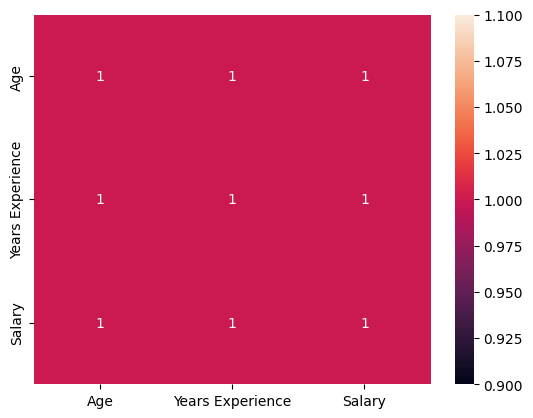

In [22]:
sns.heatmap(Corr, annot=True)

# Numerical Variable - plot Histogram / box plot

<Axes: ylabel='Frequency'>

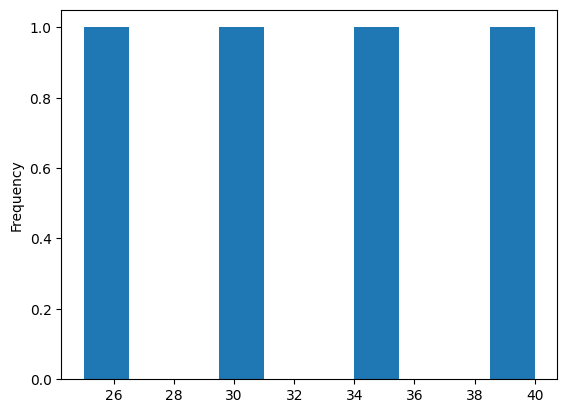

In [23]:
sal_data1['Age'].plot(kind = 'hist')

<Axes: >

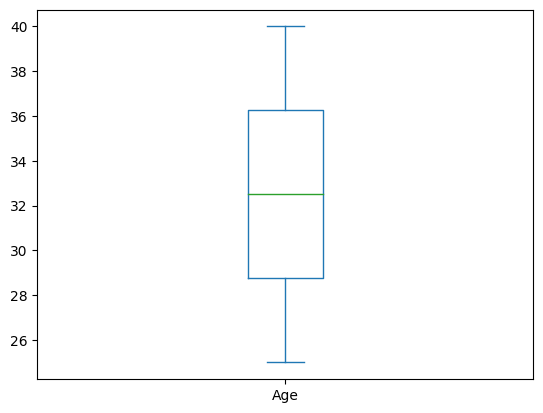

In [24]:
sal_data1.Age.plot(kind = 'box')

<Axes: >

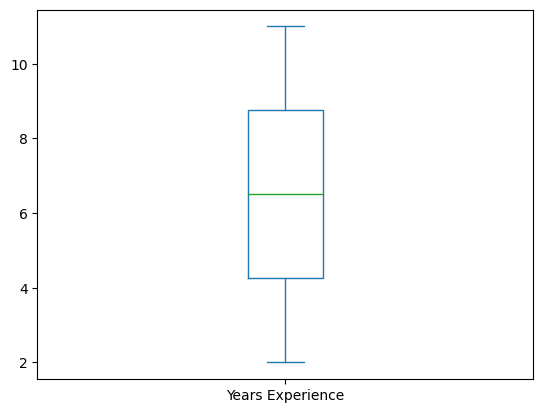

In [25]:
sal_data1['Years Experience'].plot(kind = 'box')

<Axes: >

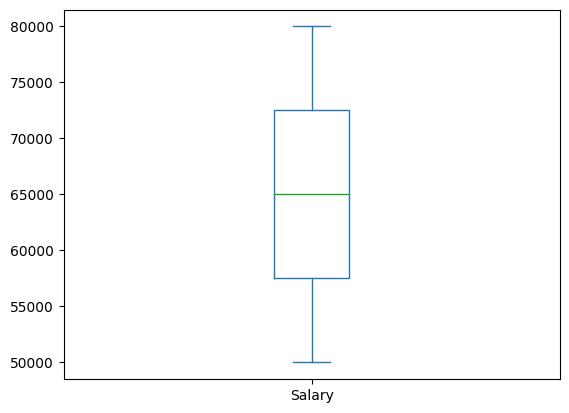

In [26]:
sal_data1.Salary.plot(kind = 'box')

<Axes: ylabel='Frequency'>

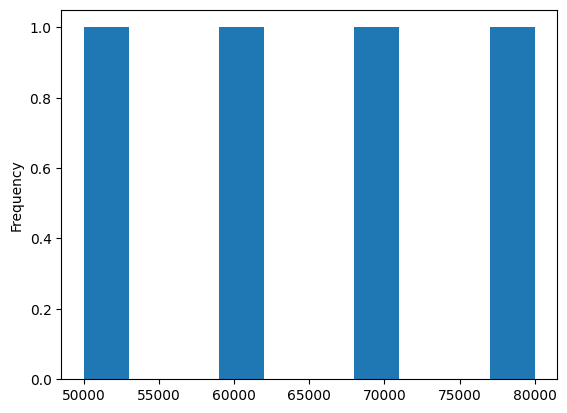

In [27]:
sal_data1.Salary.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

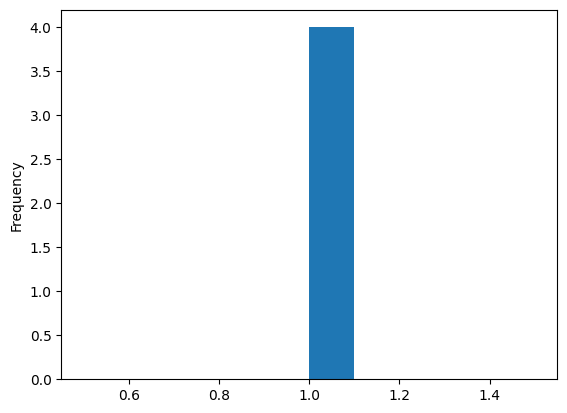

In [28]:
sal_data1.Age.value_counts().plot(kind = 'hist')

<Axes: xlabel='Age'>

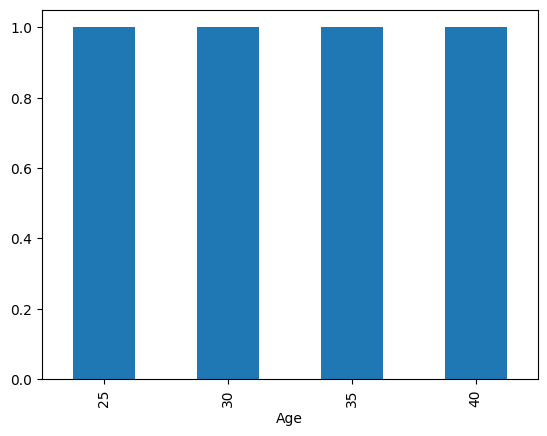

In [29]:
sal_data1['Age'].value_counts().plot(kind='bar')

<Axes: ylabel='Salary'>

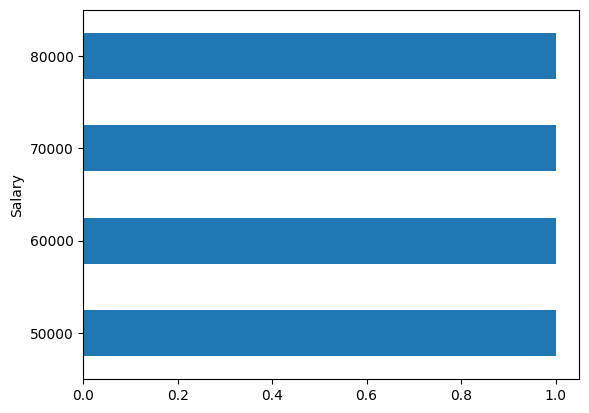

In [30]:
sal_data1['Salary'].value_counts().plot(kind='barh')

<Axes: >

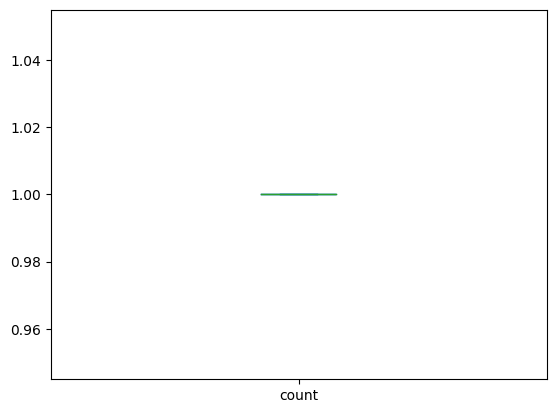

In [31]:
sal_data1.Salary.value_counts().plot(kind='box')

# Feature Engineering

Label_Encoding:

In [32]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sal_data1['job_type'] = le.fit_transform(sal_data1['Salary'])
sal_data1.head()

,Age,Years Experience,Salary,job_type
0,25,2,50000,0
1,30,5,60000,1
2,35,8,70000,2
3,40,11,80000,3


In [34]:
sal_data1['Age_encoded'] = le.fit_transform(sal_data1['Age'])

In [35]:
sal_data1['Salary_encoded'] = le.fit_transform(sal_data1['Salary'])

In [36]:
sal_data1['Years Experience_encoded'] = le.fit_transform(sal_data1['Years Experience'])

In [37]:
sal_data1['job_type_encoded'] = le.fit_transform(sal_data1['job_type'])

# Data after Label Encoding

In [38]:
sal_data1.head()

,Age,Years Experience,Salary,job_type,Age_encoded,Salary_encoded,Years Experience_encoded,job_type_encoded
0,25,2,50000,0,0,0,0,0
1,30,5,60000,1,1,1,1,1
2,35,8,70000,2,2,2,2,2
3,40,11,80000,3,3,3,3,3


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
sal_data1['Age_scaled'] = scaler.fit_transform(sal_data1[['Age']])
sal_data1['Years Experience_scaled'] = scaler.fit_transform(sal_data1[['Years Experience']])
sal_data1['Salary_scaled'] = scaler.fit_transform(sal_data1[['Salary']])


Data After Scalling:

In [41]:
sal_data1.head()

,Age,Years Experience,Salary,job_type,Age_encoded,Salary_encoded,Years Experience_encoded,job_type_encoded,Age_scaled,Years Experience_scaled,Salary_scaled
0,25,2,50000,0,0,0,0,0,-1.341641,-1.341641,-1.341641
1,30,5,60000,1,1,1,1,1,-0.447214,-0.447214,-0.447214
2,35,8,70000,2,2,2,2,2,0.447214,0.447214,0.447214
3,40,11,80000,3,3,3,3,3,1.341641,1.341641,1.341641


Dependent and independent features:

In [42]:
x = sal_data1[['Age', 'Years Experience', 'Salary', 'job_type_encoded','Age_encoded','Years Experience_encoded','Salary_encoded']]
y = sal_data1['Salary']

In [43]:
x.head()

,Age,Years Experience,Salary,job_type_encoded,Age_encoded,Years Experience_encoded,Salary_encoded
0,25,2,50000,0,0,0,0
1,30,5,60000,1,1,1,1
2,35,8,70000,2,2,2,2
3,40,11,80000,3,3,3,3


# Splitting the datd into Traning and Testing:

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [46]:
x_train.shape, y_train.shape # 80%

((3, 7), (3,))

In [47]:
x_test.shape, y_test.shape #20%

((1, 7), (1,))

# Model development:

In [48]:
from sklearn.linear_model import LinearRegression


In [49]:
linear_regessor = LinearRegression()

Model training:

In [50]:

linear_regessor.fit(x_train, y_train)

LinearRegression()

Model predections:

In [58]:
y_pred = linear_regessor.predict(x_test)
(y_pred_lr) = y_pred


In [52]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': y_pred})
df['error'] = df['y_Actual'] - df['y_Predicted']
df ['abs_error'] = abs(df['error'])
df

,y_Actual,y_Predicted,error,abs_error
2,70000,70000.0,2.910383e-11,2.910383e-11


In [53]:
Mean_error = df['abs_error'].mean()
Mean_absolute_error = df['abs_error'].mean()
Mean_absolute_error

2.9103830456733704e-11

# Model Evaluation:

In [54]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_error

Model Accuracy:

In [55]:
print("Accuracy of the model = {round(r2_score(y_test, y_pred_lr),2)*100}%")

Accuracy of the model = {round(r2_score(y_test, y_pred_lr),2)*100}%


Mean Absolute error:

In [61]:
round(mean_absolute_error(y_test, y_pred_lr),2)

0.0

In [64]:
print(f"mean_absolute_error: {mean_absolute_error(y_test,y_pred_lr),2}")

mean_absolute_error: (2.9103830456733704e-11, 2)


# Mean Squared Error:

In [71]:
mse = mean_squared_error(y_test, y_pred_lr)
mse

8.470329472543003e-22

In [72]:
print(f"mean_squared_error: {mean_squared_error(y_test,y_pred_lr),2}")

mean_squared_error: (8.470329472543003e-22, 2)


Root mean Ssquared Error:

In [73]:
print('Root Mean squared Error (RMSE) = ', mse**(0.5))

Root Mean squared Error (RMSE) =  2.9103830456733704e-11


coefficients:

In [81]:
LinearRegression.cof_ = linear_regessor.coef_
LinearRegression. intercept = linear_regessor.intercept_

Customise Predictions:

In [79]:
sal_data1.head()

,Age,Years Experience,Salary,job_type,Age_encoded,Salary_encoded,Years Experience_encoded,job_type_encoded,Age_scaled,Years Experience_scaled,Salary_scaled
0,25,2,50000,0,0,0,0,0,-1.341641,-1.341641,-1.341641
1,30,5,60000,1,1,1,1,1,-0.447214,-0.447214,-0.447214
2,35,8,70000,2,2,2,2,2,0.447214,0.447214,0.447214
3,40,11,80000,3,3,3,3,3,1.341641,1.341641,1.341641


In [96]:
std_scaler = StandardScaler()
arr = np.array([1, 2, 3, 4, 5])
strided_arr = np.lib.stride_tricks.as_strided(arr, shape=(3, 2), strides=(arr.itemsize, arr.itemsize))
print(strided_arr)

Age1 = np.array([49])
Years_Experience1 = np.array([2])
salary1 = np.array([50000])

[[1 2]
 [2 3]
 [3 4]]


In [102]:
Age1 = np.array([40])
Years_Experience1 = np.array([3])
salary1 = np.array([80000])

In [104]:
std_scaler.fit_transform([[15]])[0][0]

0.0

In [113]:
Emp_Salary = std_scaler.fit_transform(np.array([Age1, Years_Experience1, salary1]))[0]
Emp_Salary

array([-0.70661604])

In [114]:
print("salary of the employee is with above attributes is: ", Emp_Salary[0])

salary of the employee is with above attributes is:  -0.7066160372733428


In [115]:
### 9405919488 rushikeshgorakh@gmail.com